# Decision Trees

Decision trees can be used for either regression or classification tasks. Decision trees are a powerful tool; however, are very prone to overfitting the training dataset and therefore often fail to generalize well to test data sets. However, they are the building block for several other powerful machine learning algorithms and are therefore important to learn about.


What we'll be doing in this notebook:
-----

1. Import packages
2. Load data
3. Build a Decision Tree
4. Tune parameters
5. Feature importance
6. Homework
7. Advanced material

Our previous Linear regression model assumes linearity among others.

Whereas decision trees and associated algorithms are no longer restricted to independent variables which have a linear relationship and we don't have to ensure several assumptions are true. 

Therefore we can start to bring in other features that could be useful.

After we run our decision trees, we will compare our new output to our output from the linear regressions we ran in the previous notebook. 

In this notebook, we will be looking at how we can predict the loan amount using decision trees. 

Here is visual introduction to [decision trees](https://algobeans.com/2016/07/27/decision-trees-tutorial/)

## 1. Import packages

In [5]:
import graphviz 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

## Question 1. Load and format data (1 point)

In [1]:
# Q1: Load data saved locally from loans.csv
# you should load the data in a dataframe - name the variable df

We are going to build regressors to predict the loan amount and we will build a tree that considers many features in the dataset - including those we have engineered ourselves.

Here we choose a limited subset of data to conduct the analysis for the sake of training time. In practice, we should use more features. This is a mix of numeric and one hot-coded categorical variables. 

## Question 2: Drop columns that are not numeric in your dataframe (1 point)

In [2]:
# Q2: Drop everything that is not numeric
#one line of code goes here



In [8]:
y_column = 'loan_amount'
y = df[y_column]
# Drop returns a copy of the DataFrame with the specified columns removed.  
X = df.drop([y_column, "id_number"], axis=1) # id_number will not be helpful

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Build a Decision Tree
We will use sklearn's implementation of a Decision Tree Regressor and to learn how to use it, here are the [docs](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.get_params), or simply put a question mark before a call to the class.  

Prepending a ? to any method, variable, or class will display that method's defined docstring (way to go IPython!)

In [10]:
DecisionTreeRegressor?

Many of the sklearn algorithms are implemented using the same standard steps: 
- **Step 1: Initiate the algorithm** Define the parameters (& hyperparameters of the algorithm) of the algorithm. For example, the maximum depth, the minimum samples in a leaf etc. (check documentation for more information)

- **Step 2: Train the algorithm** Train the algorithm by fitting it to the X_train and y_train datasets.

- **Step 3: Evaluating the algorithm** Evaluate the predictive power of the algorithm by comparing the predictive loan amount values to the true values. We can do this for the training and testing dataset.

## Question 3. Define a function which encapsulates the three steps outlined above (3 points)

Define a function which encapsulates the 3 model implementation steps; Initialize, Train, Evaluate our decision tree regressor. 

In [11]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
    #your code goes here
    
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    #your code goes here
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    #your code goes here
    
    # Print the results!
    #your code goes here
    
    return regressor

With all tree algorithms the major challenge is using the parameters to balance the bias vs variance trade-off.  

To start, check how the model preforms when using the default values.

In [12]:
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters={'random_state':42})

Train score: 0.9830
Test score:  0.8886


Based on my run, I managed to get a perfect r2 scored on the training data but perform somewhat poorly on the test data.  This is a clear indication that the model has **overfit to the training data**.

The default sklearn's implementation of a DecisionTreeRegressor does not put any restrictions on the depth of the tree, the number of samples per leaf, etc.  Consequently, the model finds signal in the noise of the training data set, overfits and performs poorly on the test data.  

When a model overfits to a training data set, we say it has **high variance**.  Since an unconstrained decision tree will almost perfectly model any training data, it will vary tremendously depending on the training data that is provided.

### 4. Parameter tuning
To reduce the variance, we constrain the model using some of the provided parameters for example:
- Criterion (Cost function used to measure the purity of a split)
- Maximum depth of the tree
- Minimum samples for each node split
- Minimum samples for each terminal node
- Maximum number of terminal nodes

Look back over the [slides](https://docs.google.com/presentation/d/1leWPbwis9GJHJcQehlhPhtKEAErUPvlTpKjnkv1aWWU/edit?usp=sharing) or use this [useful blog](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#four) for a refresher on decision tree parameters.

Initially, we are going to experiment with the max_depth parameter only. 

In [13]:
# Define the model parameters 
# We are fixing the random state so that the results are reproducible and consistent.
parameters = {"max_depth":6,
              'random_state':42}

# Train and evaluate the model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

Train score: 0.9319
Test score:  0.9390


Although the training r2 score has dropped significantly, the test r2 score increased. Since the goal is develop a model that accurately predict data we have never seen, that is the metric we care about!



** IMPORTANT**

A DecisionTreeRegressor with a max depth of only 4 is still rather complicated. To develop your intuition for the various input parameters, manually adjust them up and down to see the impacts.

Overall we're aiming for the highest predictive power on the test set. However, if you were to tune the parameters manually towards a higher score on the test data set, we would overfit to this specific test data set and the model would not generalize well to a secondary test data set.  
To avoid this, we will use k-fold validation. In addition to k-fold validation, we will use sklearn's GridSearchCV, which allows us using k-fold validation to assess every permuation of possible values for the parameters that we provide. See the [Advanced Material](#AdvancedCV) at the bottom of this notebook for a quick overview of these two methods.

**Note** since we are training one regressor one time for each possible permutation of specified parameter values, this next cell will take some time to run.  That is why you need to gain an intuition for which values to test!

## Question 4. Write code to manipulate multiple parameters, in addition to max_depth illustrated above and use GridSearchCV to search for best tree (2 points)

In [11]:
# Set parameters to search through - known as parameter grid
parameters = #your code goes here
# Initialize model
decision_regressor= DecisionTreeRegressor(random_state=42)

# Initialize GridSearch and then fit
#your code goes here

#sample output shown below

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [8, 10, 14], 'min_impurity_decrease': [0.1, 0.01, 0.0], 'min_samples_split': [10, 50, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
# print out what GridSearchCV found to be the best parameters 
regressor.best_estimator_.get_params()
#sample output shown below

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.1,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [13]:
# evaluate the tuned model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=regressor.best_estimator_.get_params())
#sample output shown below

Train score: 0.9462
Test score:  0.9280


Performance on the test data has increased again for me - not bad! You should get different output based on your experimentation.

The R^2 number above is pretty telling but it is always good to visualise how these look in a scattor plot.

## Question 5. Plot the results (2 points)

In [14]:
# plotting a graph of the true values vs the predicted values for the training and test datasets
#sample output shown below

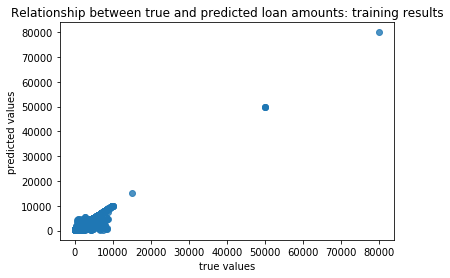

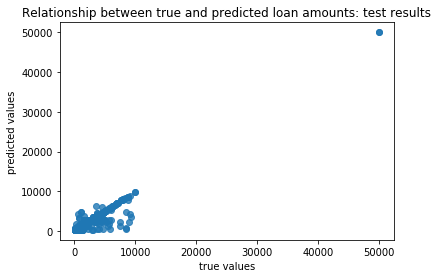


<br>
<br> 
<br>

----